In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
import pandas as pd

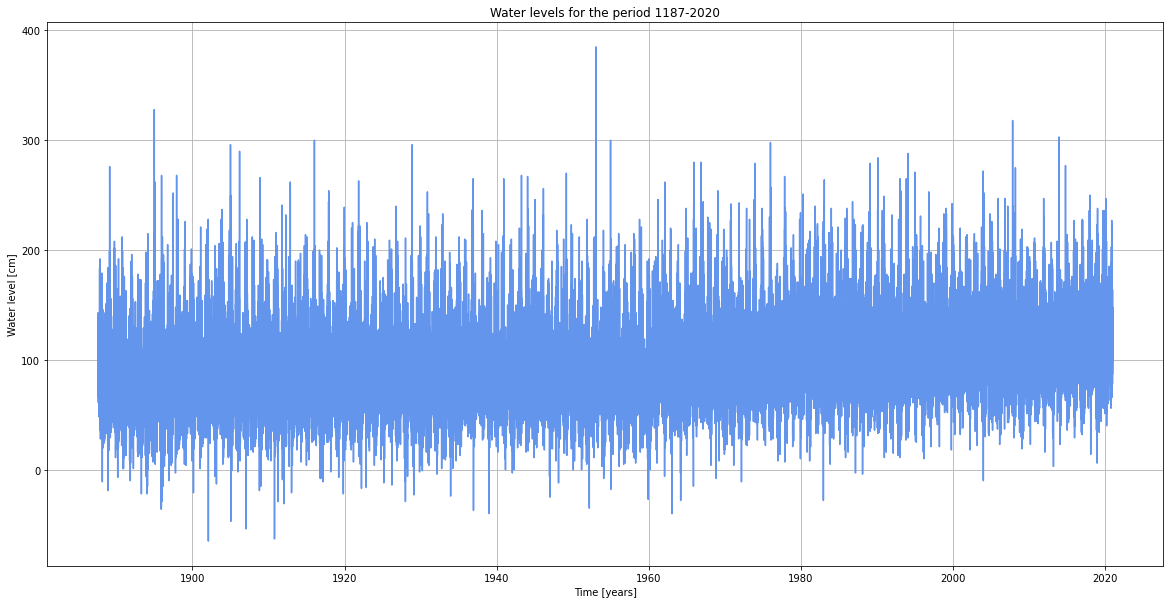

In [2]:
df = pd.read_csv(
    'Meetreeks_HVH.txt',
    delim_whitespace=True,
    header=None,
    names=['Date', 'Time', 'Value'])

df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)

# Reorganize the DataFrame to have 'Datetime' as the first column
df = df[["Datetime", "Value"]]

plt.figure(figsize=(20,10))
plt.plot(df["Datetime"], df["Value"], color = 'cornflowerblue')
plt.xlabel('Time [years]')
plt.ylabel('Water level [cm]')
plt.title('Water levels for the period 1187-2020')
plt.grid()
plt.savefig('Complete_dataset.png')

In [ ]:
## Report yearly maxima for each year
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

## Get maxima
df_yearly_max = df.groupby('Year').max()
df_yearly_max = df_yearly_max.reset_index()
df_yearly_max = df_yearly_max[['Year', 'Value']]
df_yearly_max.columns = ['Year', 'Max_value']

## Plot the yearly maxima
plt.figure(figsize=(20,10))
plt.plot(df_yearly_max['Year'], df_yearly_max['Max_value'], color = 'cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Max water level [cm]')
plt.title('Yearly maxima for the period 1187-2020')
plt.grid()